<a href="https://colab.research.google.com/github/eckoecho/CodingDojo/blob/week-11/Week%2011/Simple_Neural_Networks_(Practice).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
fpath="/content/drive/MyDrive/CodingDojo/03-AdvancedML/Week11/Data/heart - heart.csv"
df = pd.read_csv(fpath)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
#Checking for missing values
df["Cholesterol"].value_counts(normalize="true")

0      0.187364
254    0.011983
223    0.010893
220    0.010893
230    0.009804
         ...   
392    0.001089
316    0.001089
153    0.001089
466    0.001089
131    0.001089
Name: Cholesterol, Length: 222, dtype: float64

In [7]:
#Setting x and y
X = df.drop(columns="HeartDisease")
y = df["HeartDisease"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [9]:
X_train.shape

(688, 11)

In [10]:
num_cols = make_column_selector(dtype_include="number")
scaler = StandardScaler()
num_pipe = make_pipeline(scaler)
num_tuple = ("Numeric", num_pipe, num_cols)

In [11]:
cat_cols = make_column_selector(dtype_include="object")
ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
cat_pipe = make_pipeline(ohe)
cat_tuple = ("Categorical", cat_pipe, cat_cols)

In [12]:
processor = ColumnTransformer([num_tuple, cat_tuple], remainder="passthrough" ,verbose_feature_names_out=False)

In [13]:
#process the data
X_train_processed = processor.fit_transform(X_train)
X_test_processed = processor.transform(X_test)

# Model 1

In [14]:
model = Sequential()
# First hidden layer
model.add(Dense(10, input_dim = X_train_processed.shape[1],activation="relu"))
#Second hidden layer
model.add(Dense(5, activation="relu"))
#Outer layer
model.add(Dense(1, activation="sigmoid"))
#Compile model
model.compile(optimizer="adam", loss="bce", metrics="accuracy")

In [15]:
from sklearn.utils import validation
# train the model and save the history
history = model.fit(X_train_processed, y_train,
                    validation_data=(X_test_processed, y_test),
                    epochs=10)

Epoch 1/10
22/22 [==============================] - 2s 15ms/step - loss: 0.6200 - accuracy: 0.6439 - val_loss: 0.5842 - val_accuracy: 0.7304
Epoch 2/10
22/22 [==============================] - 0s 4ms/step - loss: 0.5937 - accuracy: 0.7049 - val_loss: 0.5618 - val_accuracy: 0.7696
Epoch 3/10
22/22 [==============================] - 0s 4ms/step - loss: 0.5741 - accuracy: 0.7297 - val_loss: 0.5425 - val_accuracy: 0.7870
Epoch 4/10
22/22 [==============================] - 0s 5ms/step - loss: 0.5557 - accuracy: 0.7674 - val_loss: 0.5271 - val_accuracy: 0.8087
Epoch 5/10
22/22 [==============================] - 0s 5ms/step - loss: 0.5402 - accuracy: 0.7805 - val_loss: 0.5121 - val_accuracy: 0.8087
Epoch 6/10
22/22 [==============================] - 0s 5ms/step - loss: 0.5256 - accuracy: 0.7892 - val_loss: 0.4989 - val_accuracy: 0.8087
Epoch 7/10
22/22 [==============================] - 0s 4ms/step - loss: 0.5106 - accuracy: 0.8081 - val_loss: 0.4838 - val_accuracy: 0.8217
Epoch 8/10
22/22 [=

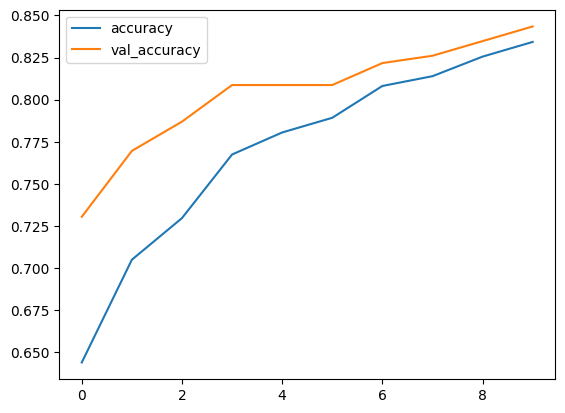

In [16]:
# plot model training and testing history
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()

8/8 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        98
           1       0.87      0.86      0.86       132

    accuracy                           0.84       230
   macro avg       0.84      0.84      0.84       230
weighted avg       0.84      0.84      0.84       230



<Axes: >

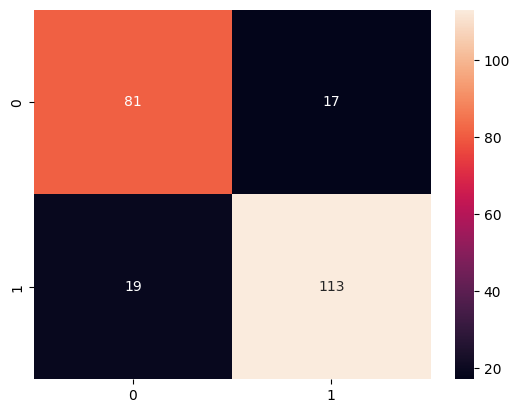

In [17]:
#evaluate the model
test_preds = model.predict(X_test_processed).round()
print(classification_report(y_test, test_preds))
conf_mat = confusion_matrix(y_test, test_preds)
sns.heatmap(conf_mat, annot=True, fmt="g")

# Model 2 w/ 20 Neurons

In [18]:
#Instatiate model
model2 = Sequential()
#First layer
model2.add(Dense(20, activation="relu", input_dim = X_train_processed.shape[1]))
#Second layer
model2.add(Dense(5, activation="relu"))
#Final layer
model2.add(Dense(1, activation="sigmoid"))
#compile model
model2.compile(optimizer="adam", loss="bce", metrics="accuracy")

In [19]:
# train the model and save the history
history = model2.fit(X_train_processed, y_train, validation_data=(X_test_processed, y_test), epochs=10)

Epoch 1/10
22/22 [==============================] - 1s 12ms/step - loss: 0.7385 - accuracy: 0.3794 - val_loss: 0.6963 - val_accuracy: 0.4826
Epoch 2/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6772 - accuracy: 0.5407 - val_loss: 0.6611 - val_accuracy: 0.6261
Epoch 3/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6421 - accuracy: 0.6875 - val_loss: 0.6328 - val_accuracy: 0.7043
Epoch 4/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6029 - accuracy: 0.7573 - val_loss: 0.5994 - val_accuracy: 0.7739
Epoch 5/10
22/22 [==============================] - 0s 4ms/step - loss: 0.5534 - accuracy: 0.8067 - val_loss: 0.5536 - val_accuracy: 0.8043
Epoch 6/10
22/22 [==============================] - 0s 4ms/step - loss: 0.4985 - accuracy: 0.8328 - val_loss: 0.5038 - val_accuracy: 0.8217
Epoch 7/10
22/22 [==============================] - 0s 4ms/step - loss: 0.4501 - accuracy: 0.8358 - val_loss: 0.4607 - val_accuracy: 0.8348
Epoch 8/10
22/22 [=

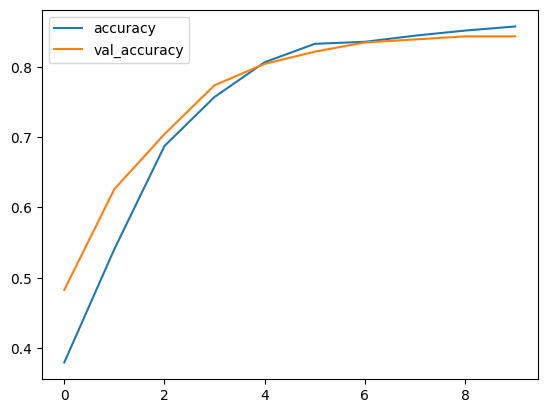

In [20]:
# plot model training history
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend();

8/8 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        98
           1       0.89      0.83      0.86       132

    accuracy                           0.84       230
   macro avg       0.84      0.85      0.84       230
weighted avg       0.85      0.84      0.84       230



<Axes: >

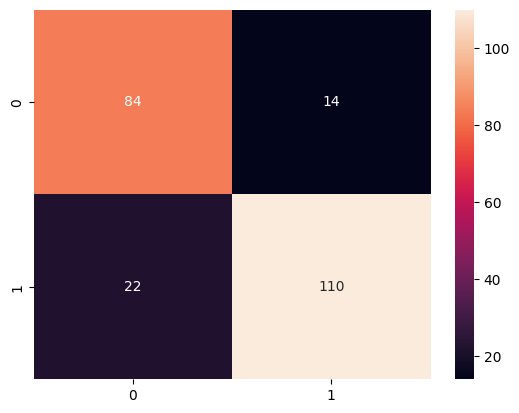

In [21]:
#Evaluate model
test_preds = model2.predict(X_test_processed).round()
print(classification_report(y_test, test_preds))
#Create confusion matrix
conf_mat = confusion_matrix(y_test, test_preds)
#Put confusion matrix into heatmap for visuals
sns.heatmap(conf_mat, annot=True, fmt="g")

# Model 3 w/ 30 Neurons

In [22]:
#Instantiate Sequential model
model3 = Sequential()
#Getting number of features
input_shape = X_train_processed.shape[1]
#First layer
model3.add(Dense(30,
                input_dim = input_shape,
                activation="relu"))
#Second layer
model3.add(Dense(15,
                activation="relu"))
#Final layer
model3.add(Dense(1,
                activation="sigmoid"))
#Compile model
model3.compile(optimizer="adam", loss="bce", metrics="accuracy")

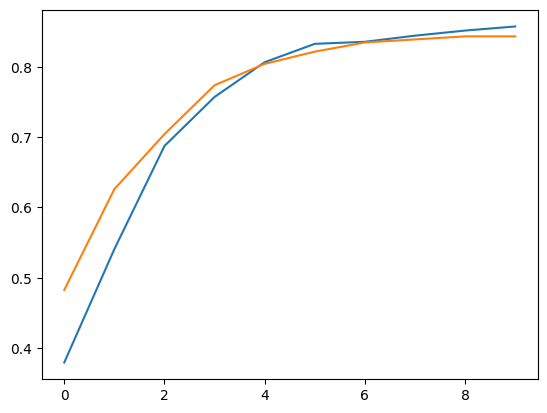

In [25]:
#Plot training and testing history
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy");

8/8 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.24      0.08      0.12        98
           1       0.54      0.80      0.65       132

    accuracy                           0.50       230
   macro avg       0.39      0.44      0.38       230
weighted avg       0.41      0.50      0.42       230



<Axes: >

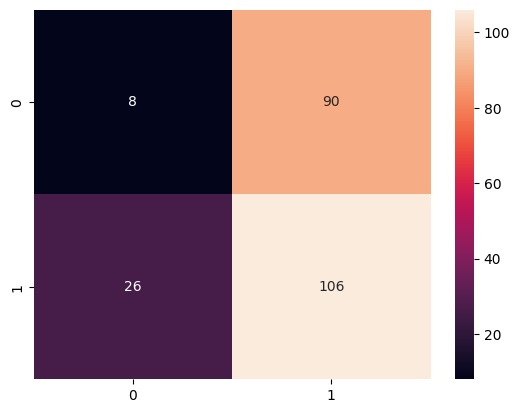

In [28]:
#Evaluate model
test_preds = model3.predict(X_test_processed).round()
print(classification_report(y_test, test_preds))
#Create confusion matrix
conf_mat = confusion_matrix(y_test, test_preds)
#Put confusion matrix into heatmap for visuals
sns.heatmap(conf_mat, annot=True, fmt="g")